In [2]:
from sympy import*
%matplotlib inline
import matplotlib.pyplot as plt
from __future__ import division
x, y, z, t = symbols('x y z t')
k, m, n = symbols('k m n', integer = True)
f, g, h = symbols('f g h', cls = Function)
import math

In [3]:
def f(x, y):
    return cos(2*x) + sin(3*x)

In [4]:
def y(t):
    return (1/2 * sin(2*t) - 1/3 * cos(3*t) + 4/3)

In [5]:
def Euler(startPoint, endPoint, numIntervals, initialCondition):
    stepSize = (endPoint - startPoint) / numIntervals
    tlist = [startPoint]
    wlist = [initialCondition]
    t = startPoint
    current_w = initialCondition
    
    for i in range (1, numIntervals + 1):
        current_w = current_w + stepSize * f(t, current_w)        
        t = startPoint + i * stepSize
        tlist.append(t)
        wlist.append(current_w)
    
    return tlist, wlist

In [6]:
def Heun2(startPoint, endPoint, numIntervals, initialCondition):
    stepSize = (endPoint - startPoint) / numIntervals
    tlist = [startPoint]
    wlist = [initialCondition]
    t = startPoint
    current_w = initialCondition
    
    for i in range (1, numIntervals + 1):
        k1 = f(t, current_w) #Euler's
        k2 = f(t + stepSize, current_w + stepSize * k1)
        slope = (k1 + k2) / 2
        current_w = current_w + stepSize * slope       
        t = startPoint + i * stepSize
        tlist.append(t)
        wlist.append(current_w)
    
    return tlist, wlist

In [7]:
def RK4(startPoint, endPoint, numIntervals, initialValue):
    stepSize = (endPoint - startPoint) / numIntervals
    tlist = [startPoint]
    wlist = [initialValue]
    t = startPoint
    current_w = initialValue
    
    for i in range (1, numIntervals + 1):
        k1 = stepSize * f(t, current_w) #Euler's
        k2 = stepSize * f(t + stepSize / 2, current_w + k1 / 2)
        k3 = stepSize * f(t + stepSize / 2, current_w + k2 / 2)
        k4 = stepSize * f(t + stepSize, current_w + k3)
        slope = (k1 + 2*k2 + 2*k3 + k4) / 6
        current_w = current_w + slope       
        t = startPoint + i * stepSize
        tlist.append(t)
        wlist.append(current_w)
    
    return tlist, wlist

In [8]:
tlist, wlist = Euler(0, 10, 100, 1)
ylist = []
error = []
length = len(tlist)
for i in range(0, length):
    ylist = ylist + [y(tlist[i])]
    error = error + [abs(y(tlist[i]) - wlist[i])]
     
tlist1, wlist1 = Heun2(0, 10, 100, 1)
error1 = []
length = len(tlist1)
for i in range(0, length):
    error1 = error1 + [abs(y(tlist1[i]) - wlist1[i])]
    
tlist2, wlist2 = RK4(0, 10, 100, 1)
error2 = []
length = len(tlist2)
for i in range(0, length):
    error2 = error2 + [abs(y(tlist2[i]) - wlist2[i])]
     
for i in range(0, 11):
    print ('t = %.1f, error_e = %.7f, error_w = %.7f, error_r = %.7f, true_y = %.7f'%(tlist[i], error[i], error1[i], error2[i], ylist[i]))

t = 0.0, error_e = 0.0000000, error_w = 0.0000000, error_r = 0.0000000, true_y = 1.0000000
t = 0.1, error_e = 0.0142225, error_w = 0.0004432, error_r = 0.0000001, true_y = 1.1142225
t = 0.2, error_e = 0.0253720, error_w = 0.0010868, error_r = 0.0000003, true_y = 1.2529306
t = 0.3, error_e = 0.0323222, error_w = 0.0018891, error_r = 0.0000005, true_y = 1.4084512
t = 0.4, error_e = 0.0342302, error_w = 0.0027929, error_r = 0.0000008, true_y = 1.5712255
t = 0.5, error_e = 0.0306199, error_w = 0.0037300, error_r = 0.0000011, true_y = 1.7304898
t = 0.6, error_e = 0.0214373, error_w = 0.0046271, error_r = 0.0000014, true_y = 1.8750869
t = 0.7, error_e = 0.0070701, error_w = 0.0054113, error_r = 0.0000017, true_y = 1.9943402
t = 0.8, error_e = 0.0116697, error_w = 0.0060171, error_r = 0.0000019, true_y = 2.0789180
t = 0.9, error_e = 0.0335996, error_w = 0.0063915, error_r = 0.0000021, true_y = 2.1216145
t = 1.0, error_e = 0.0572524, error_w = 0.0064990, error_r = 0.0000021, true_y = 2.1179795

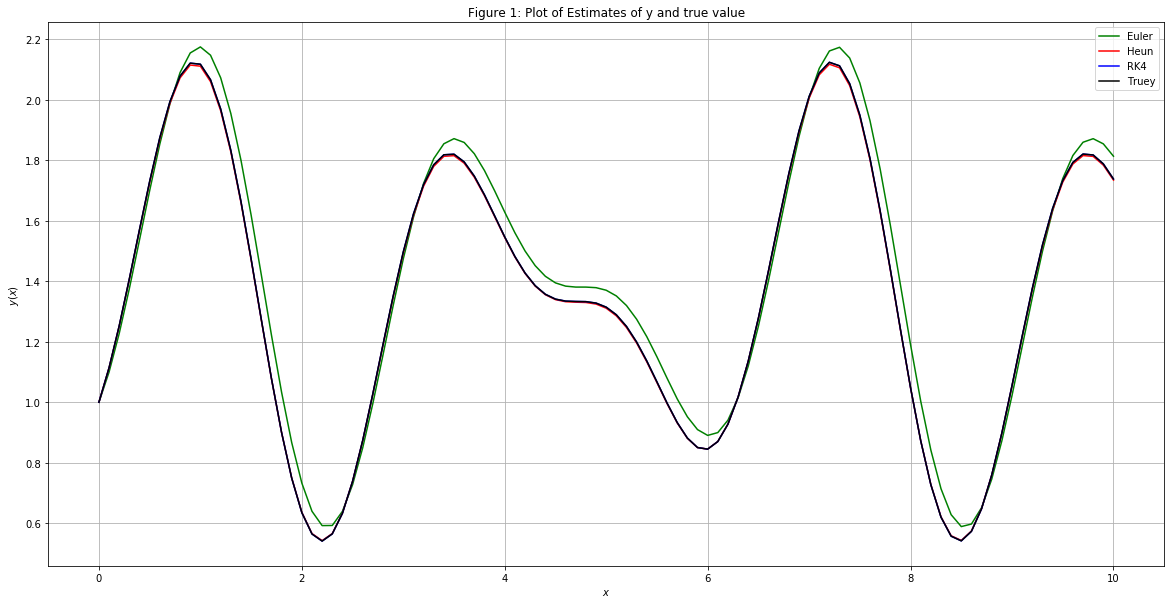

In [9]:
plt.figure(figsize=(20,10))
plt.plot(tlist,wlist, color = "g", label = "Euler")
plt.plot(tlist1,wlist1, color = "r", label = "Heun")
plt.plot(tlist2,wlist2, color = "b", label = "RK4")
plt.plot(tlist,ylist, color = "k", label = "Truey")
plt.plot()
plt.xlabel('$x$')
plt.ylabel('$y(x)$')
plt.title("Figure 1: Plot of Estimates of y and true value")
plt.legend()
plt.grid(True)
plt.show()

In [13]:
def RK4_update(startPoint, endPoint, numIntervals, initialValue, a, b, c, d): #modify RK4 a bit
    stepSize = (endPoint - startPoint) / numIntervals
    tlist = [startPoint]
    wlist = [initialValue]
    t = startPoint
    current_w = initialValue
    
    for i in range (1, numIntervals + 1):
        k1 = stepSize * f(t, current_w) #Euler's
        k2 = stepSize * f(t + stepSize / 2, current_w + k1 / 2)
        k3 = stepSize * f(t + stepSize / 2, current_w + k2 / 2)
        k4 = stepSize * f(t + stepSize, current_w + k3)
        slope = (a*k1 + b*k2 + c*k3 + d*k4) / (a + b + c + d)
        current_w = current_w + slope       
        t = startPoint + i * stepSize
        tlist.append(t)
        wlist.append(current_w)
    
    return tlist, wlist

In [14]:
def totalError(list1, list2):
    error = 0
    for i in range (0, len(list1)):
        error = error + abs(list1[i] - list2[i])
    return error       

In [21]:
numIntervals = 100

etlist, ewlist = RK4_update(0, 10, numIntervals, 1, 1, 2, 2, 1)

minError = totalError(ewlist, ylist)
minError



0.000101481885768417

In [ ]:
for i1 in range(1, 5):
    for i2 in range(1, 5):
        for i3 in range(1, 5):
            for i4 in range(1, 5):
                etlist2, ewlist2 = RK4_update(0, 10, numIntervals, 1, i1, i2, i3, i4)
                error = totalError(ewlist2, ylist)
                if (error <= minError):
                    print("%d, %d, %d, %d, %.10f"%(i1, i2, i3, i4, error))
